In [4]:
%load_ext autoreload
%autoreload 2

In [5]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [6]:
path = '../results/sampling_no_searching'
exps = sorted([exp[:-5] for exp in os.listdir(path)])

In [7]:
summary = pd.DataFrame(columns = ['dataset', 'model', 'sample', 'threshold', 'test score', 'test score global', 'performance gap', 'complexity class difference'])
df_best_score = pd.DataFrame(columns = ['dataset', 'model', 'best score'])
i = 0
for exp in exps:
    
    with open(f'{path}/{exp}.json', 'r') as fin:
        exp_summary = json.load(fin)
    with open(f'../results/instance_selection/{exp}.json', 'r') as fin:
        best_score = json.load(fin)
        
    for model in ['SVC', 'KNeighborsClassifier', 'RandomForestClassifier', 'GradientBoostingClassifier']:
        summary.loc[i, 'model'] = model
        summary.loc[i, 'dataset'] = exp
        summary.loc[i, 'threshold'] = exp_summary[model]['threshold']
        summary.loc[i, 'sample'] = exp_summary[model]['sample_proportion']
        summary.loc[i, 'test score'] = exp_summary[model]['test_score']
        summary.loc[i, 'test score global'] = best_score[model]['test_score']
        summary.loc[i, 'complexity class difference'] = abs(exp_summary[exp]['info']['complexity']['class 0'][0] - exp_summary[exp]['info']['complexity']['class 1'][0])
        i += 1
summary.loc[:, 'performance gap'] = summary['test score global']-summary['test score']

In [25]:
# diferencia de complejidad < 0.15, incluyo el triple de ceros (casi todo ceros y me los estoy comiendo)
summary[(summary['complexity class difference'] < 15e-2) & (summary['performance gap'] > 10e-3)]

,dataset,model,sample,threshold,test score,test score global,performance gap,complexity class difference
8,australian,SVC,0.44,0.2,0.810859,0.828872,0.018013,0.064756
11,australian,GradientBoostingClassifier,0.81,0.45,0.826747,0.844729,0.017982,0.064756
17,banknote,KNeighborsClassifier,0.03,0.65,0.956031,1.0,0.043969,0.006315
18,banknote,RandomForestClassifier,0.03,0.35,0.881984,0.996333,0.114349,0.006315
19,banknote,GradientBoostingClassifier,0.03,0.45,0.875349,0.996333,0.120985,0.006315
24,bupa,SVC,0.95,0.85,0.569923,0.616436,0.046513,0.013083
25,bupa,KNeighborsClassifier,0.67,0.55,0.569923,0.59544,0.025517,0.013083
26,bupa,RandomForestClassifier,0.22,0.3,0.552121,0.594118,0.041997,0.013083
28,cleve,SVC,0.94,0.8,0.785112,0.802488,0.017376,0.07597
31,cleve,GradientBoostingClassifier,0.94,0.8,0.801536,0.852004,0.050469,0.07597


In [24]:
# diferencia de complejidad > 0.25, incluyo la clase más compleja completa
summary[(summary['complexity class difference'] > 10e-2) & (summary['performance gap'] > 10e-3)]

,dataset,model,sample,threshold,test score,test score global,performance gap,complexity class difference
14,backache,RandomForestClassifier,0.85,0.55,0.5,0.710442,0.210442,0.676355
15,backache,GradientBoostingClassifier,0.94,0.85,0.5,0.710442,0.210442,0.676355
45,flare,KNeighborsClassifier,0.82,0.55,0.587346,0.610883,0.023537,0.568154
46,flare,RandomForestClassifier,0.78,0.4,0.595756,0.655041,0.059286,0.568154
52,german_numer,SVC,0.92,0.8,0.700518,0.715562,0.015044,0.37219
53,german_numer,KNeighborsClassifier,0.81,0.6,0.617215,0.644094,0.026879,0.37219
54,german_numer,RandomForestClassifier,0.92,0.8,0.700422,0.737439,0.037017,0.37219
55,german_numer,GradientBoostingClassifier,0.97,0.95,0.684081,0.71418,0.030099,0.37219
59,haberman,GradientBoostingClassifier,0.91,0.8,0.394799,0.459537,0.064738,0.39523
69,ilpd,KNeighborsClassifier,0.81,0.6,0.435446,0.468005,0.032559,0.290319


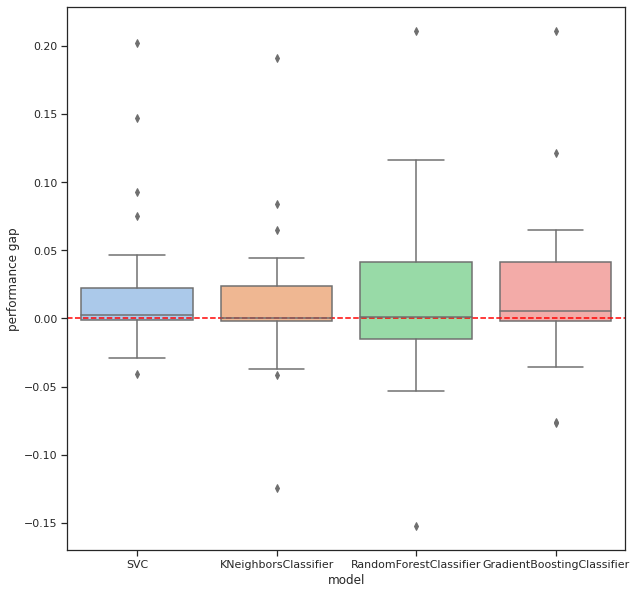

In [61]:
sns.set(rc={'figure.figsize':(10,10)})
sns.set_theme(style="ticks", palette="pastel")
sns.boxplot(data=summary, x="model", y='performance gap')
plt.axhline(0, ls='--', c='red')
plt.show()

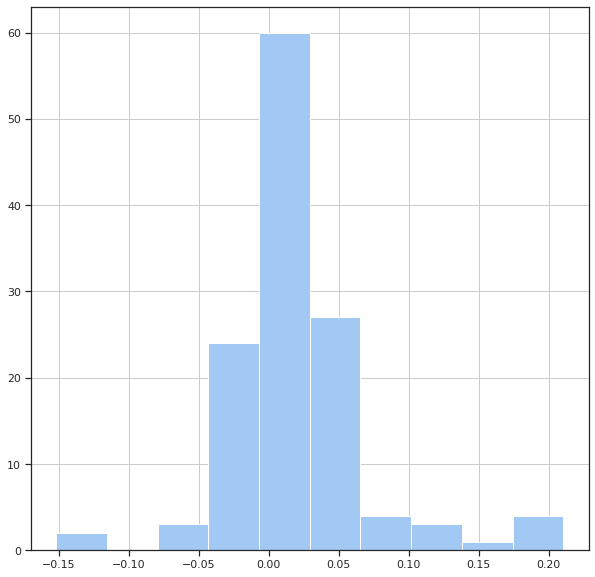

In [62]:
summary['performance gap'].hist(bins=10);

In [63]:
for model in ['SVC', 'KNeighborsClassifier', 'RandomForestClassifier', 'GradientBoostingClassifier']:
    print(model)
    print(summary[summary.model == model]['performance gap'].astype(float).describe(), '\n')

SVC
count    32.000000
mean      0.020306
std       0.049199
min      -0.041091
25%      -0.001296
50%       0.002453
75%       0.022633
max       0.202015
Name: performance gap, dtype: float64 

KNeighborsClassifier
count    32.000000
mean      0.009785
std       0.048082
min      -0.124435
25%      -0.001752
50%       0.000024
75%       0.024032
max       0.190588
Name: performance gap, dtype: float64 

RandomForestClassifier
count    32.000000
mean      0.015665
std       0.061146
min      -0.151957
25%      -0.014989
50%       0.000661
75%       0.041327
max       0.210442
Name: performance gap, dtype: float64 

GradientBoostingClassifier
count    32.000000
mean      0.019145
std       0.052130
min      -0.076730
25%      -0.001644
50%       0.005358
75%       0.040995
max       0.210442
Name: performance gap, dtype: float64 



In [65]:
for model in ['SVC', 'KNeighborsClassifier', 'RandomForestClassifier', 'GradientBoostingClassifier']:
    print(model)
    print(summary[summary.model == model]['sample'].astype(float).describe(), '\n')

SVC
count    32.000000
mean      0.710000
std       0.281963
min       0.000000
25%       0.582500
50%       0.750000
75%       0.940000
max       0.990000
Name: sample, dtype: float64 

KNeighborsClassifier
count    32.000000
mean      0.701250
std       0.290681
min       0.000000
25%       0.627500
50%       0.800000
75%       0.932500
max       0.990000
Name: sample, dtype: float64 

RandomForestClassifier
count    32.000000
mean      0.684063
std       0.313429
min       0.000000
25%       0.517500
50%       0.780000
75%       0.942500
max       0.990000
Name: sample, dtype: float64 

GradientBoostingClassifier
count    32.000000
mean      0.711875
std       0.294108
min       0.000000
25%       0.635000
50%       0.800000
75%       0.942500
max       0.990000
Name: sample, dtype: float64 



In [66]:
for model in ['SVC', 'KNeighborsClassifier', 'RandomForestClassifier', 'GradientBoostingClassifier']:
    print(model)
    print(summary[summary.model == model]['threshold'].astype(float).describe(), '\n')

SVC
count    32.000000
mean      0.631250
std       0.243546
min       0.200000
25%       0.450000
50%       0.750000
75%       0.800000
max       0.950000
Name: threshold, dtype: float64 

KNeighborsClassifier
count    32.000000
mean      0.673438
std       0.230702
min       0.100000
25%       0.587500
50%       0.775000
75%       0.850000
max       0.950000
Name: threshold, dtype: float64 

RandomForestClassifier
count    32.00000
mean      0.66250
std       0.24462
min       0.15000
25%       0.47500
50%       0.75000
75%       0.90000
max       0.95000
Name: threshold, dtype: float64 

GradientBoostingClassifier
count    32.000000
mean      0.676563
std       0.214771
min       0.250000
25%       0.450000
50%       0.750000
75%       0.850000
max       0.950000
Name: threshold, dtype: float64 



In [51]:
import scipy.stats as st

In [64]:
st.spearmanr(summary['test score'], summary['test score global'])[0]

0.9367553255970775